In [49]:
import pylab
import scipy.cluster.hierarchy as sch
import numpy as np
import pandas as pd
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
import matplotlib.pyplot as plt
import scipy.spatial.distance as dist
from scipy import stats
import random
import math
import os
%matplotlib inline
savePath = './correlation/'

def load_data():
    npz_data = np.load('./spearmanRankCorrelation.npz')
    corr = npz_data['corr']
    return corr

def plotHeatMap(data,length,title,tSize,hLabel,bLabel,lSize,fSize,figName,tripIndex,dendro):
    # length is the how many datapoints you have, data is a length-by-length matrix
    # tSize is the title fontsize, hLabel is the axis label, bLabel is the colorBar label
    # lSize is the label fontsize, fSize is the figure size
    # tripIndex is the index order, dendro is a boolean variable, True will show the dendrogram.
    print 'Into plotting...'
    fig = pylab.figure()
    Y = sch.linkage(data, method='centroid')
    if dendro:
        axdendro = fig.add_axes([0.05,0.1,0.2,0.8])
        axdendro.set_xticks([])
        #axdendro.set_yticks([])
    Z = sch.dendrogram(Y, orientation='right',no_plot = not dendro)
    T = sch.fcluster(Y, 20, 'maxclust')
    Tcount = T.tolist()
    Tcount = [Tcount.count(x) for x in Tcount]
    tempIndex = np.array(Tcount).argsort()[::-1]
#     print tempIndex
    print Tcount
    print T
    print 'Finish dendrogram...'
    print 'Start plotting heatmap...'
    # Plot distance matrix.
    xIndex = range(1,length+1)
    if dendro:
        axmatrix = fig.add_axes([0.3,0.1,0.6,0.8])
    else:
        axmatrix = fig.add_axes([0.1,0.1,0.7,0.8])
    index = Z['leaves']
#     print 'leaves',index
    if dendro or len(tripIndex) == 0:
        tripIndex = tempIndex
    data = data[tripIndex,:]
    data = data[:,tripIndex]
    im = axmatrix.matshow(data, aspect='auto', origin='lower',vmin=data.min(), vmax=data.max())
    axmatrix.set_xticks(np.arange(0,length,200), minor=False)
    axmatrix.set_xticklabels(tripIndex[::200],fontsize = lSize-10)
    pylab.xlabel(r'\textbf{'+hLabel+'}',fontsize = lSize)
    axmatrix.set_yticks([])

    # Plot colorbar.
    axcolor = fig.add_axes([0.81,0.1,0.02,0.8])
    # adjusting your colorbar limit
    cbar = pylab.colorbar(im, cax=axcolor,ticks=[-0.6, -0.4, -0.2, 0, 0.2,0.4,0.6,0.8, 1.0])
    cbar.set_label(bLabel, rotation=270,labelpad=30,fontsize = lSize)
    cbar.ax.tick_params(labelsize=lSize) 
    # Display and save figure.
    fig.show()
    fig = pylab.gcf()
    fig.canvas.set_window_title(title)
    fig.set_size_inches(5*fSize, 5*fSize)
    if len(figName)>0:
        fig.savefig(savePath+figName+'.png')
    return tempIndex,T

(1540, 1540)
Into plotting...
[1132, 1132, 1132, 1132, 1132, 1132, 1132, 1132, 329, 1132, 4, 329, 329, 1, 329, 1132, 1132, 24, 1132, 1132, 1132, 1132, 329, 1132, 1132, 329, 329, 1132, 1132, 1132, 329, 1132, 1132, 1132, 1132, 1132, 33, 1132, 1132, 1132, 1132, 4, 1132, 1132, 1132, 1132, 1132, 1132, 1132, 329, 1132, 1132, 1132, 1132, 329, 1132, 1132, 1132, 1132, 329, 1132, 1132, 1132, 1132, 1132, 1132, 329, 1132, 329, 329, 1132, 1132, 1132, 1132, 1132, 1132, 1132, 1132, 1132, 1132, 1132, 329, 1132, 1132, 1132, 329, 1132, 1132, 1132, 1132, 1132, 24, 1132, 329, 1132, 1132, 24, 1132, 1132, 1132, 1132, 1132, 1132, 1132, 1132, 1132, 1132, 1132, 1132, 1132, 1132, 1132, 24, 1132, 1132, 1132, 1132, 329, 1132, 1132, 1132, 329, 1132, 1132, 329, 329, 329, 329, 1132, 1132, 329, 1132, 1132, 1132, 1132, 1132, 329, 1132, 1132, 1132, 1132, 1132, 1132, 1132, 1132, 1132, 1132, 1132, 1132, 329, 329, 329, 329, 1132, 1132, 1132, 329, 1132, 1132, 1132, 1132, 1132, 1132, 1132, 1132, 1132, 1132, 1132, 329, 1132,

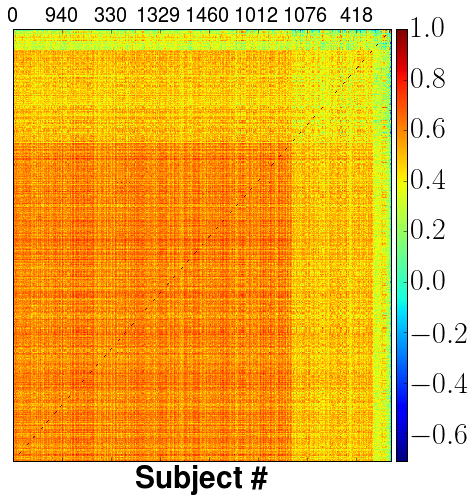

In [55]:
data = load_data()
print data.shape
lSize = 30
fName = 'crossCorrTri'
dendro = False
totalSub =data.shape[1]
# totalSub = 500
tripIndex,cluster = plotHeatMap(data,totalSub,'Correlation HeatMap',24,\
                        'Subject \#','',lSize,1.5,fName,[],dendro)

In [51]:
print tripIndex
def creatDict(cluster):
    clusterDict = dict()
    for i in range(len(cluster)):
        if cluster[i] not in clusterDict.keys():
            clusterDict[cluster[i]] = [i]
        else:
            clusterDict[cluster[i]].append(i)
    return clusterDict
clusterDict = creatDict(cluster)
import pickle
pickle.dump(clusterDict, open(savePath +'clusterDict.txt', "wb" ) )

[   0  216  750 ...,  993 1197  423]


In [52]:
data.trace()

1540.0